In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
x = np.linspace(1, 10, 200)
y = 5 + 2*x+3*x**2 # np.random.normal(1, 10, 200)

data = pd.DataFrame()
data["x"]=x
data["y"]=y

update_feature = sm.add_constant(data["x"])
model = sm.OLS(data["y"], update_feature).fit()

In [8]:
pred = model.predict()
err = model.resid

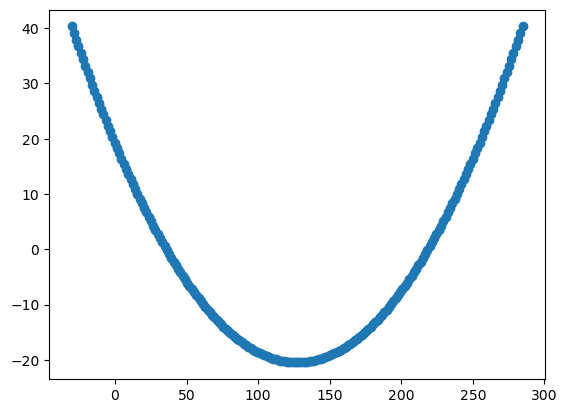

In [9]:
plt.scatter(pred, err)

In [14]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.961    
Dependent Variable: y                AIC:                1734.1937
Date:               2025-08-24 10:13 BIC:                1740.7903
No. Observations:   200              Log-Likelihood:     -865.10  
Df Model:           1                F-statistic:        4941.    
Df Residuals:       198              Prob (F-statistic): 5.63e-142
R-squared:          0.961            Scale:              338.03   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const      -65.2965    3.0314  -21.5402  0.0000  -71.2744  -59.3186
x           35.0000    0.4979   70.2955  0.0000   34.0181   35.9819
------------------------------------------------------------------
Omnibus:               30.369       Durbin-Watson:          0.001 
Prob(Omn

# what is durbin watson?
The Durbin-Watson statistic tests for autocorrelation in the residuals of a regression model.

- Range: 0 to 4
- Value ≈ 2: No autocorrelation
- Value < 2: Positive autocorrelation (residuals are similar to each other)
- Value > 2: Negative autocorrelation (residuals alternate in sign)


#### In summary:
Durbin-Watson helps you check if your residuals are independent. Values far from 2 suggest that your model’s errors are not random, which can affect the reliability of your regression results.

In [15]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['f-value', 'p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test[2:])

[('f-value', np.float64(0.0)), ('p-value', np.float64(1.0))]

This code performs the Breusch-Pagan test for homoscedasticity (constant variance of residuals):

model.resid: residuals from your regression model.
model.model.exog: independent variables (with constant).
sms.het_breuschpagan(...): runs the Breusch-Pagan test.
lzip(name, test[2:]): pairs the names with the test results (f-value and p-value).

Interpretation of your result:


[('f-value', 0.0), ('p-value', 1.0)]

In [16]:
emp_data = pd.read_csv("employee_compensation.csv")

In [17]:
emp_data

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fiscal,2016,1629,100222.50,17166.13,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,Fiscal,2014,35471,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,2016,42176,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,2016,10980,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43
